In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('GoldLoan.csv')

In [5]:
df.head()

,Unnamed: 0,Date,SPX,GLD,USO,SLV,EUR/USD
0,0,2008-02-01 00:00:00,1447.160034,84.860001,78.470001,15.180,1.471692
1,1,2008-03-01 00:00:00,1447.160034,85.570000,78.370003,15.285,1.474491
2,2,2008-04-01 00:00:00,1411.630005,85.129997,77.309998,15.167,1.475492
3,3,2008-07-01 00:00:00,1416.180054,84.769997,75.500000,15.053,1.468299
4,4,2008-08-01 00:00:00,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
df.isnull().sum()

,0
Unnamed: 0,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [11]:
df['Date'].unique()

array(['2008-02-01 00:00:00', '2008-03-01 00:00:00',
       '2008-04-01 00:00:00', ..., '2018-10-05 00:00:00',
       '2018-05-14 00:00:00', '2018-05-16 00:00:00'], dtype=object)

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df['Date'] = df['Date'].dt.date

df.drop(columns=['Date'], inplace=True)


In [13]:
df.head()

,Unnamed: 0,SPX,GLD,USO,SLV,EUR/USD,Year,Month,Day
0,0,1447.160034,84.860001,78.470001,15.180,1.471692,2008,2,1
1,1,1447.160034,85.570000,78.370003,15.285,1.474491,2008,3,1
2,2,1411.630005,85.129997,77.309998,15.167,1.475492,2008,4,1
3,3,1416.180054,84.769997,75.500000,15.053,1.468299,2008,7,1
4,4,1390.189941,86.779999,76.059998,15.590,1.557099,2008,8,1


In [14]:
df['Year'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
      dtype=int32)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2290 non-null   int64  
 1   SPX         2290 non-null   float64
 2   GLD         2290 non-null   float64
 3   USO         2290 non-null   float64
 4   SLV         2290 non-null   float64
 5   EUR/USD     2290 non-null   float64
 6   Year        2290 non-null   int32  
 7   Month       2290 non-null   int32  
 8   Day         2290 non-null   int32  
dtypes: float64(5), int32(3), int64(1)
memory usage: 134.3 KB


<Axes: >

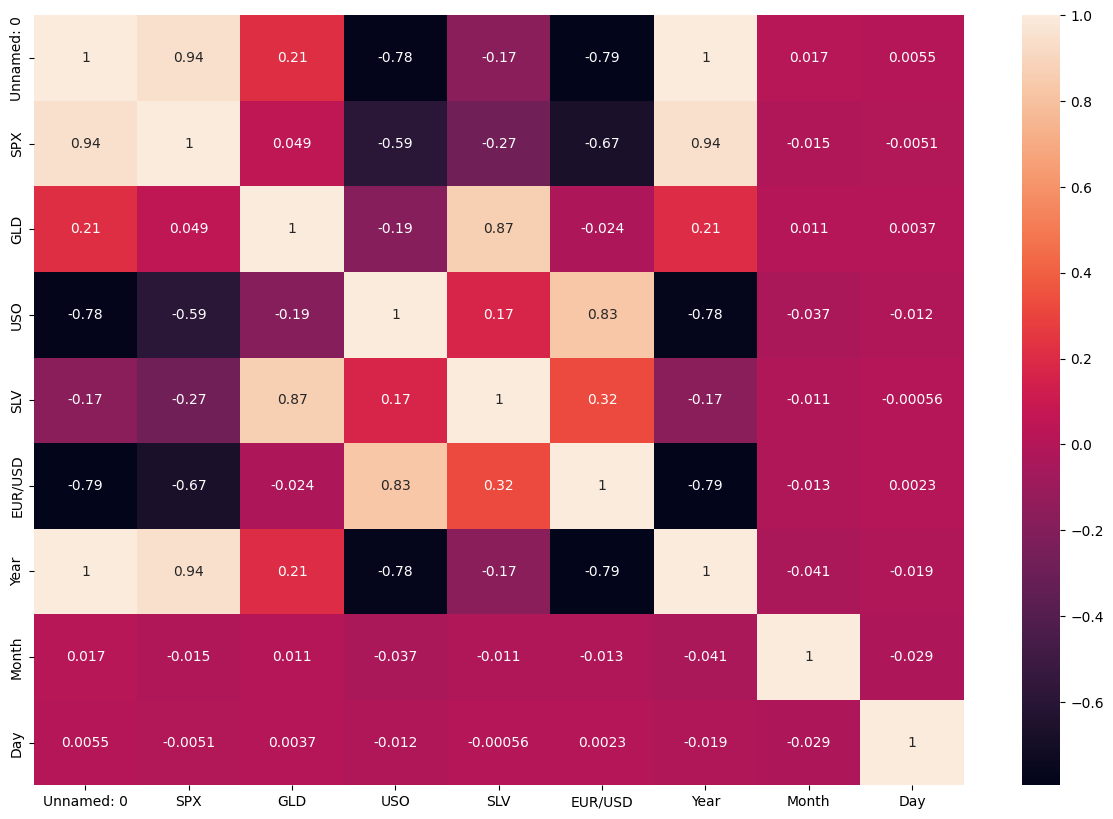

In [18]:
figsize=(15,10)
plt.figure(figsize=figsize)
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [20]:
df.drop(columns=['Month','Day','Unnamed: 0'],inplace=True)

In [21]:
df.head()

,SPX,GLD,USO,SLV,EUR/USD,Year
0,1447.160034,84.860001,78.470001,15.180,1.471692,2008
1,1447.160034,85.570000,78.370003,15.285,1.474491,2008
2,1411.630005,85.129997,77.309998,15.167,1.475492,2008
3,1416.180054,84.769997,75.500000,15.053,1.468299,2008
4,1390.189941,86.779999,76.059998,15.590,1.557099,2008


In [22]:
X = df.drop(columns=['GLD'])
y = df['GLD']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [26]:
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error
def evaluate(model,X_train,y_train,X_test,y_test):
  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)


  print(f"Accuracy for your {model} is: ")
  print(f"R2 score for training {model} is {r2_score(y_train,train_pred)}")
  print(f"R2 score for testing {model} is {r2_score(y_test,test_pred)}")
  #MAE
  print(f"training MAE for {model} is {mean_absolute_error(y_train,train_pred)}")
  print(f"testing MAE for {model} is {mean_absolute_error(y_test,test_pred)}")
  #RMSE
  print(f"training RMSE for {model} is {root_mean_squared_error(y_train,train_pred)}")
  print(f"testing RMSE for {model} is {root_mean_squared_error(y_test,test_pred)}")

In [28]:
evaluate(lr,X_train,y_train,X_test,y_test)

Accuracy for your LinearRegression() is: 
R2 score for training LinearRegression() is 0.8983749692714982
R2 score for testing LinearRegression() is 0.9118794474452113
training MAE for LinearRegression() is 5.416256552061239
testing MAE for LinearRegression() is 5.12069801687628
training RMSE for LinearRegression() is 7.40882966861781
testing RMSE for LinearRegression() is 6.951006385538483
